# Boosting model

### 1) Reading of the processed dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

X_train = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/ML-Boosting-PilarZarco/data/raw/diabete.csv")

y_test = list(y_test["Outcome"])
y_train = list(y_train["Outcome"])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106,56,27,165,29.0,0.426,22
1,1,89,66,23,94,28.1,0.167,21
2,1,116,78,29,180,36.1,0.496,25
3,6,115,60,39,125,33.7,0.245,40
4,5,136,82,29,125,32.3,0.640,69


### 2) Model initialisation and training (Without hyperparameters)

In [36]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 71)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=71, ...)

### 3) Model prediction

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7337662337662337

### 4) Save the model (Without hyperparameters)

In [39]:
model.save_model("/workspaces/ML-Boosting-PilarZarco/models/Boosting_default_71.json")

### 5) Model initialisation and training (With hyperparameters)

In [40]:
from sklearn.metrics import accuracy_score  
from xgboost import XGBClassifier

# Definition of hyperparameter search space:
hyperparams = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

### 6) Model prediction

In [41]:
from sklearn.model_selection import ParameterGrid

accs = []
for combination in ParameterGrid(hyperparams):
    model = XGBClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = XGBClassifier(**best_combination)
best_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Initialise the model and the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=hyperparams, n_iter=10, cv=5, random_state=71)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=1.0, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=5, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.2...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=71)

In [44]:
# Predictions in the test set and training set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Print predictions
print(y_pred_test)
print(y_pred_train)

[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 0 0]
[0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 

In [45]:
# Obtain the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

# Hide warnings to keep the code clean
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Perform grid search
grid.fit(X_train, y_train)

# Obtain the best hyperparameters found
best_hyperparams = grid.best_params_

# Prints the best combination of hyperparameters 
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [46]:
# Calculate the accuracy in the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate the accuracy in the training set
accuracy_train =accuracy_score(y_train, y_pred_train)

print("Accuracy Test:", accuracy_test, "\nAccuracy Train:", accuracy_train)

Accuracy Test: 0.7727272727272727 
Accuracy Train: 0.8289902280130294


In [47]:
# Create a DataFrame with the search results in a grid
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027050,0.008049,0.009230,0.013225,0.8,0,0.01,3,50,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.691057,0.756098,0.666667,0.707317,0.713115,0.706851,0.029424,319
1,0.050254,0.061355,0.006401,0.007229,0.8,0,0.01,3,50,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.691057,0.756098,0.682927,0.707317,0.721311,0.711742,0.025833,304
2,0.028217,0.000535,0.002510,0.000042,0.8,0,0.01,3,100,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.756098,0.821138,0.723577,0.739837,0.762295,0.760589,0.033135,128
3,0.031810,0.006562,0.002621,0.000081,0.8,0,0.01,3,100,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.772358,0.821138,0.699187,0.756098,0.762295,0.762215,0.038948,116
4,0.082458,0.018437,0.007838,0.004100,0.8,0,0.01,3,200,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.764228,0.804878,0.715447,0.764228,0.770492,0.763854,0.028533,99


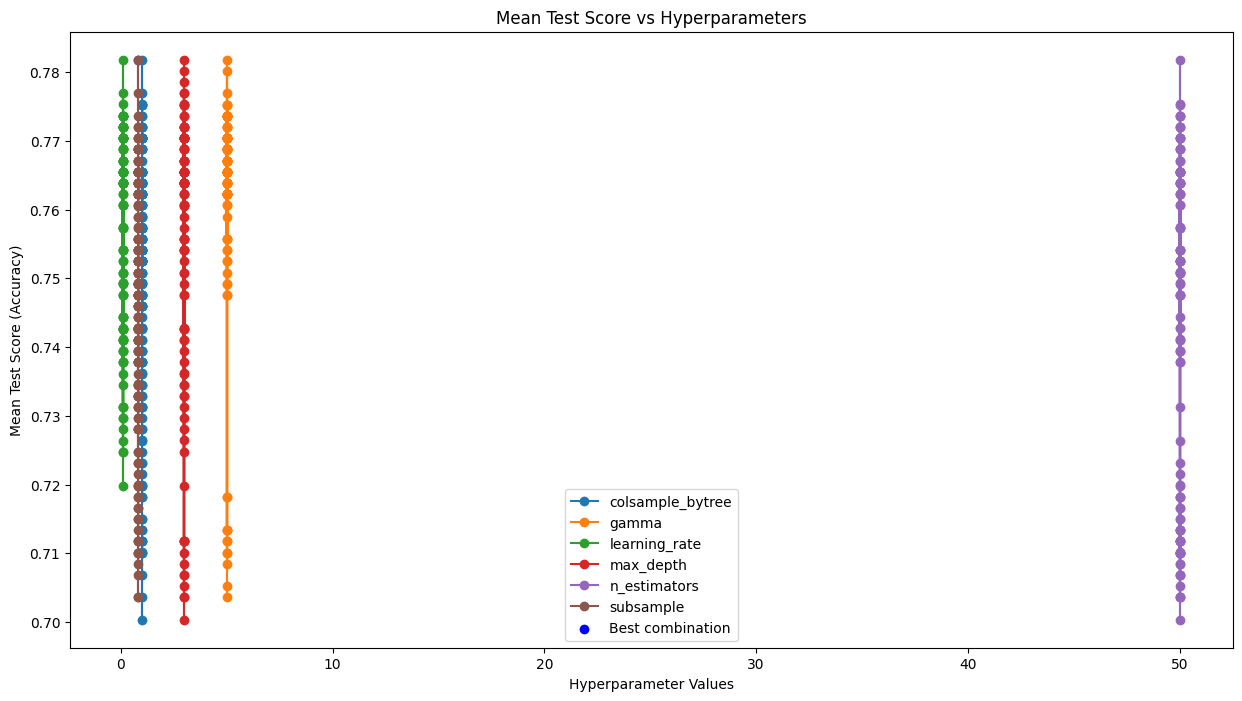

In [48]:
# Create a single graph
fig, ax = plt.subplots(figsize=(15, 8))

hyperparams_to_plot = list(best_hyperparams.keys())

for param_to_plot in hyperparams_to_plot:
    # Check if expected column exists in cv_results
    if f'param_{param_to_plot}' in cv_results.columns:
        param_results = cv_results[cv_results[f'param_{param_to_plot}'] == best_hyperparams[param_to_plot]]

        # Plot results only if there is data for the hyperparameter
        if not param_results.empty:
            ax.plot(param_results[f'param_{param_to_plot}'], param_results['mean_test_score'], marker='o', label=f'{param_to_plot}')

# Marking the best combination
ax.scatter(best_hyperparams[param_to_plot], grid.best_score_, color='blue', label='Best combination')

ax.set_title('Mean Test Score vs Hyperparameters')
ax.set_xlabel('Hyperparameter Values')
ax.set_ylabel('Mean Test Score (Accuracy)')
ax.legend()

plt.show()


### 7) Save the model (With hyperparameters)

In [49]:
model.save_model("/workspaces/ML-Boosting-PilarZarco/models/xgb_regressor_71.json")

### 8) Analyse and compare the results of the models

#### - Accuracy Decision tree model
* Accuracy without optimising 0.7077922077922078
* Accuracy optimised 0.7207792207792207

Slightly improved after optimisation.
May be a suitable option if simplicity and interpretability of the model are valued.
It is the easiest model to understand and explain, and has reasonable accuracy. However, it may not be the best suited to capture the complexity and non-linearity of the data.
Is the worst fit to the data and the worst predictor of labels.

#### - Accuracy Random forest model
* Accuracy Test: 0.7987012987012987 
* Accuracy Train: 0.8485342019543974

Performs well on both test set and training set.
Less prone to overfitting compared to the boosting model.
Good choice if looking for a balance between performance and robustness.
 In addition, it can handle categorical and missing features better than the boosting model.
Is the best fit to the data and the best predictor of labels.

#### - Accuracy Boosting model
* Accuracy Test: 0.7727272727272727 
* Accuracy Train: 0.8289902280130294

Performs acceptably, but not optimally.
Has some overfitting, as the training accuracy is higher than the test accuracy.